# Pandas Tutorial 

An introduction to Pandas, using March Madness data.

## Import Modules 

This tutorial uses pandas, numpy and matplotlib.  The easiest way to get all these modules (and other useful modules for scientific computing such as Scikit-Learn) is with anaconda.  Instructions to download can be found here: https://www.anaconda.com/distribution/ This tutorial is with python 3.7.

**Jupyter Tip**  Adding a "!" before the execution of jupyter cells allows you to run command-line arguments within your notebook. 
Here we use this to check our python version.

In [2]:
!python --version

Python 3.7.3


In [3]:
# generally pandas is imported under the alias pd
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Introduction to Pandas

Pandas is a python library that provides data structures known as **DataFrames**.  These structures are extremely useful for manipulating large and complex datasets efficiently.  

We can think of the structures as multidimensional arrays, similar to ndarrays in NumPy.  However, a few key features make them much more versatile, namely their ability to 

* contain attached row and column labels 
* contain heterogeneous types (example, one column of floats, and another column of strings) 
* handle missing data

## Creating a DataFrame

To understand how a DataFrame works we can create one from a python dictionary. 

Let's say we have data from a poll taken on three different days of students on campus at Duke, on whether Duke or UNC basketball would score more points in the nights' games against their respective competition. The results could look something like this: 

In [4]:
data = {
    'duke': [3, 2, 7, 1], 
    'unc': [0, 3, 0, 2]
}

In [5]:
results = pd.DataFrame(data)

Here each row represents the results of each day's poll, the first column represents how many students voted for Duke to win more points, and the second column represents how many students voted for UNC to win more points.

In [6]:
results

,duke,unc
0,3,0
1,2,3
2,7,0
3,1,2


This was created by pandas taking each (key,value) pair, and corresponding it to a column in the resulting DataFrame. 

If we would like to label what each row means, we can pass an **index** list: 

In [7]:
results = pd.DataFrame(data, index=['Monday', 'Thursday', 'Friday', 'Saturday'])

In [8]:
results

,duke,unc
Monday,3,0
Thursday,2,3
Friday,7,0
Saturday,1,2


Now if we want to acess the results for a given day of the week, we can use the **loc**ate command: 

In [9]:
results.loc['Monday']

duke    3
unc     0
Name: Monday, dtype: int64

## Reading in Data from a CSV

We've shown how to create a small dataframe using a dictionary, but let's say we have a large set stored in a file. 

It's possible to read in a file and immediately convert the data to a pandas dataframe using **read_csv**:

In [10]:
df = pd.read_csv('data/RegularSeasonCompactResults.csv')

This dataset is much larger, if we would like to just look for now at the column names and first couple entries we can: 

In [11]:
len(df)

150684

In [12]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


This dataset is of the game-by-game results for many seasons of historical data.  The above cell shows that this dataset contains the season year, day, ID of the winning team, winning score, losing team ID, losing score, location in reference to the winning team, and the number of overtime periods in the game.

## Accessing Column Information

Now that we've read in the data, we would like to know some information about the different column values. 

To access a particular column, we can use either a dictionary-style indexing of the column name, for example df['Season'], or an attribute-style access with column names that are strings: 

In [13]:
df['Season'].head()

0    1985
1    1985
2    1985
3    1985
4    1985
Name: Season, dtype: int64

In [14]:
df.Season.head()

0    1985
1    1985
2    1985
3    1985
4    1985
Name: Season, dtype: int64

If we would like to acess the column names as an object, we can do: 

In [15]:
df.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT'],
      dtype='object')

Once we have accessed the column, we can gather some information about its values. For one thing, we can check how many unique teams there are.

In [16]:
teams = df.WTeamID.unique() # This provides an array of the unique values in the WTeamID column

In [17]:
len(teams) # So we have data for 364 teams

364

We can also get some statistical information, for example if we would like to know the most points any one team has scored: 

In [18]:
df.WScore.max()

186

And the least: 

In [19]:
df.LScore.min()

20

For now we've accessed the list of teams via their ID numbers, however, what if we want to organize based on the actual team names? For this we can read in a list of the team identifiers, and replace the team id column.

In [20]:
teams = pd.read_csv('data/Teams.csv')

In [21]:
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [22]:
team_mapper = dict(zip(teams.TeamID,teams.TeamName))

In [23]:
df.replace({'WTeamID':team_mapper}).head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,Illinois,81,1328,64,N,0
1,1985,25,Alabama St,77,1354,70,H,0
2,1985,25,Arizona,63,1223,56,H,0
3,1985,25,Cornell,70,1432,54,H,0
4,1985,25,F Dickinson,86,1447,74,H,0


This shows us something important about pandas dataframes.  Performing an operation on the object like this is not automatically in place. If we would like to permanently change df to the version with the new column values, we need to include the inplace=True option, alternatively, we could make a new, df_replaced object:

In [24]:
df_replaced = df.replace({'WTeamID':team_mapper})

In [25]:
df_replaced.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,Illinois,81,1328,64,N,0
1,1985,25,Alabama St,77,1354,70,H,0
2,1985,25,Arizona,63,1223,56,H,0
3,1985,25,Cornell,70,1432,54,H,0
4,1985,25,F Dickinson,86,1447,74,H,0


In [26]:
df.replace({'WTeamID':team_mapper},inplace=True)

In [27]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,Illinois,81,1328,64,N,0
1,1985,25,Alabama St,77,1354,70,H,0
2,1985,25,Arizona,63,1223,56,H,0
3,1985,25,Cornell,70,1432,54,H,0
4,1985,25,F Dickinson,86,1447,74,H,0


In [28]:
df.replace({'LTeamID':team_mapper},inplace=True)

Now we have a dataframe with the team names more easily accessible!

## Operating on Data in Pandas

As we mentioned, pandas dataframes are different from NumPy arrays for several reasons.  However, it would be useful if we could perform operations on the data contained in a pandas dataframe just as we would with NumPy arrays, and it turns out we can! Pandas is designed to work with NumPy, so any NumPy ufunc will work on Pandas DataFrame objects. 

As an example, let's say we would like to create a new column in the df, that contains the total points scored in each game, we can create the new column in a dictionary-like manner, and can perform a sum of two columns of the existing dataframe just as we would with a NumPy array: 

In [29]:
df['TScore'] = df['WScore'] + df['LScore']

In [30]:
df['TScore'].head()

0    145
1    147
2    119
3    124
4    160
Name: TScore, dtype: int64

Note that this will work with a variety of numpy functions: 

In [31]:
np.exp(df['TScore']).head() # Not super useful for this data, but serves as an example

0    9.390741e+62
1    6.938871e+63
2    4.797813e+51
3    7.120586e+53
4    3.069850e+69
Name: TScore, dtype: float64

## Handling Missing Data

Often times our dataset will have values that are missing, this can occur for a variety of reasons and is super common, but annoying if we are trying to perform operations or get statistics about the data. 

As an example, let's say we had a NaN in our poll dataset: 

In [32]:
data = {
    'duke': [3, 2, 7, 1], 
    'unc': [0, 3, 0, np.nan]
}

In [33]:
results = pd.DataFrame(data)

In [34]:
results['total'] = results['duke']+results['unc']

We find that if we perform operations that row will cause the results to also be NaN. 

In [35]:
results

,duke,unc,total
0,3,0.0,3.0
1,2,3.0,5.0
2,7,0.0,7.0
3,1,NaN,NaN


We have a couple options to deal with this issue, one is within Numpy, which contains special aggregations that will ignore these missing values: 

In [36]:
np.nansum(results['unc'])

3.0

Alternatively, within Pandas, we have several options.  One is to drop the rows that contain any NaN values: 

In [37]:
results.dropna()

,duke,unc,total
0,3,0.0,3.0
1,2,3.0,5.0
2,7,0.0,7.0


Note that this drops the entire row, for which *any* column has a NaN value, so depending on how many NaN's we have, we could end up losing quite a bit of data.

Another option is to fill the NaN's with a value, such as zero: 

In [38]:
results = results.fillna(0)

## Combining Datasets: Concat and Append 

We can imagine a scenario where two different people hosted the same poll on several different days, in this case we might have two datsets we would like to combine. 

We can handle this scenario using the **concat** option: 

In [39]:
data2 = {
    'duke': [1, 4, 6, 2], 
    'unc': [0, 2, 0, 2]
}

Here is an opportunity to show another useful option, and this is how to drop columns:

In [40]:
results.drop(columns=['total'],inplace=True)

This ensures that the two data frames have the same column values, this is what we want if we are using the default concatenation axis.

In [41]:
results2 = pd.DataFrame(data2)

In [42]:
combined_results = pd.concat([results,results2])

In [43]:
combined_results

,duke,unc
0,3,0.0
1,2,3.0
2,7,0.0
3,1,0.0
0,1,0.0
1,4,2.0
2,6,0.0
3,2,2.0


Here we notice that the indices are preserved between the dataframes.

It turns out that direct array concatenation is super common, so there is a way to do this in a more compact way using **append**:

In [44]:
results.append(results2)

,duke,unc
0,3,0.0
1,2,3.0
2,7,0.0
3,1,0.0
0,1,0.0
1,4,2.0
2,6,0.0
3,2,2.0


Before we go back to our march madness dataset, let's save our combined df, we can do this using **to_csv**:

In [45]:
results.to_csv('data/poll_results.csv')

## GroupBy

Let's now go back to our march madness dataset.  We gathered some information about the minimum and maximum scores over all seasons, but let's say that we would like to look at total scores over a season. 

We can do this via a DataFrameGroupBy object: 

In [46]:
df.groupby('Season').sum().head()

,DayNum,WScore,LScore,NumOT,TScore
Season,,,,,
1985,305751,279240,238646,29,517886
1986,308109,283020,240727,8,523747
1987,324583,305346,261407,33,566753
1988,314181,315505,267742,15,583247
1989,319423,329938,280696,23,610634


Text(0, 0.5, 'TScores')

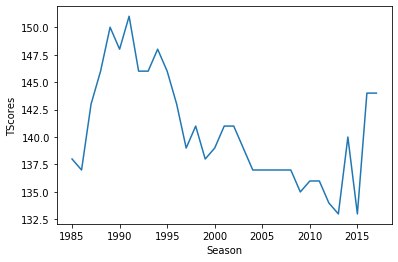

In [47]:
# This let's us plot for example the median total points scored in each season
plt.plot(df.groupby('Season').median()['TScore'])
plt.xlabel('Season')
plt.ylabel('TScores')

It's also possible to pass a dictionary mapping column names to operations to be applied on that column, for example if we would like the median total score, maximum winning score and minimum losing score we would do: 

In [48]:
df.groupby('Season').aggregate({'WScore':'max','LScore':'min','TScore':'median'}).head()

,WScore,LScore,TScore
Season,,,
1985,142,27,138
1986,151,30,137
1987,133,25,143
1988,152,31,146
1989,181,30,150


## Making Cuts on Data

Often times there are outliers in the data that we might want to ignore, one way of doing this is via a robust sigma-clipping operation, and using the **query** function to cut out outliers:

In [49]:
quartiles = np.percentile(df['TScore'],[25,50,75])

In [50]:
mu = quartiles[1]

In [51]:
sig = 0.74*(quartiles[2]-quartiles[0])

In [52]:
games = df.query('(TScore>@mu - 5*@sig)&(TScore<@mu+5*@sig)')

Note the similarities above of what we often do with numpy arrays, which is to create a mask: 

In [53]:
mask = (df.TScore>mu-5*sig) & (df.TScore<mu+5*sig)

In [54]:
games = df[mask]

In [55]:
max(df.TScore)

331

In [56]:
max(games.TScore)

247

This results in the same cut, however, because of the way NumPy works, is much less effecient.  Because NumPy evaluates each subexpression, this is roughly equivalent to: 

In [57]:
mask = (df.TScore>mu-5*sig)
mask&=(df.TScore<mu+5*sig)

Because every intermediate step is explicitly allocated in memory.  Pandas however, uses Numexpr a libary that allows you to compute this type of compound expression element by element, without the need to allocatae full intermediate arrays.

Similarly, pandas eval function uses string expressions to effiently compute operations using DataFrames.

In [58]:
df.eval('WScore+LScore').head()

0    145
1    147
2    119
3    124
4    160
dtype: int64

We can even use it to assign a column, just like we did with TScore:

In [59]:
df.eval('DScore = WScore-LScore',inplace=True)

In [60]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,TScore,DScore
0,1985,20,Illinois,81,Oklahoma,64,N,0,145,17
1,1985,25,Alabama St,77,S Carolina St,70,H,0,147,7
2,1985,25,Arizona,63,Houston Bap,56,H,0,119,7
3,1985,25,Cornell,70,Utica,54,H,0,124,16
4,1985,25,F Dickinson,86,Wagner,74,H,0,160,12


Notice that we can apply several cuts at once, on different column values, this allows us to do things such as select each of the games won by Duke, and compare the scores for home and away:

In [61]:
team = 'Duke'
home = 'H'
away = 'A'
duke_home_games = df.query('(WTeamID==@team & WLoc==@home)')

duke_away_games = df.query('(WTeamID==@team & WLoc==@away)')

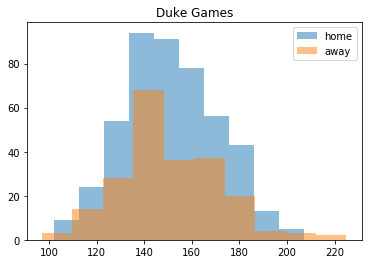

In [62]:
plt.title('Duke Games')
plt.hist(duke_home_games['TScore'],alpha=0.5,label='home')
plt.hist(duke_away_games['TScore'],alpha=0.5,label='away')
plt.legend(loc='best')

Above are the total scores for games won by Duke, if we would like to make a table of all the games won in a season per team we can use a pivot table.  Pivot tables, are a lot like GroupBy objects, but allows for a multidimensional summarization of the data.

In [63]:
# This action groups the data by season, counts the number of games won per season, and fills the missing season 
# (when a team won zero games) with zeros 
table = df.pivot_table(index='Season',columns=['WTeamID'],aggfunc='count',fill_value=0).head() #replace NAN with zero

In [64]:
table.head()

DScore                                                           \
WTeamID Abilene Chr Air Force Akron Alabama Alabama A&M Alabama St Albany NY   
Season                                                                         
1985              0         5     9      21           0         10         0   
1986              0         6    18      22           0          8         0   
1987              0         8    18      26           0         12         0   
1988              0         7    18      13           0          6         0   
1989              0        10    21      23           0         11         0   

                                              ...     WScore                 \
WTeamID Alcorn St Alliant Intl American Univ  ... Wichita St William & Mary   
Season                                        ...                             
1985           19            1             7  ...         17             15   
1986           14            5             7  ...         13              7   
1987            5            9             9  ...         21              3   
1988            7            9            13  ...         19              8   
1989            4            8            14  ...         18              4   

                                                                                
WTeamID Winthrop Wisconsin Wofford Wright St Wyoming Xavier Yale Youngstown St  
Season                                                                          
1985           0        12       0         0      12     15   11            16  
1986           0         9       0         0      18     23   12            10  
1987           6        11       0         0      21     14   13             8  
1988          13        12       0        14      25     24   12             6  
1989          12        15       0        13      14     20    9             3  

[5 rows x 2912 columns]

In [68]:
# Say we would like the values displayed to be the median total scores of games won throughout the season, then we 
# can use the values option 
table = df.pivot_table(index='Season',columns=['WTeamID'],aggfunc='median',values='TScore',fill_value=0) 

In [69]:
table.head()

WTeamID,Abilene Chr,Air Force,Akron,Alabama,Alabama A&M,Alabama St,Albany NY,Alcorn St,Alliant Intl,American Univ,...,Wichita St,William & Mary,Winthrop,Wisconsin,Wofford,Wright St,Wyoming,Xavier,Yale,Youngstown St
Season,,,,,,,,,,,,,,,,,,,,,
1985,0.0,141.0,131.0,130.0,0.0,142.0,0.0,162.0,107.0,154.0,...,161.0,131.0,0.0,138.5,0.0,0.0,130.0,141.0,132.0,136.0
1986,0.0,124.0,137.5,140.0,0.0,171.0,0.0,146.5,172.0,145.0,...,132.0,123.0,0.0,138.0,0.0,0.0,132.0,153.0,138.5,125.0
1987,0.0,159.5,146.5,149.0,0.0,153.0,0.0,151.0,167.0,140.0,...,123.0,132.0,139.5,128.0,0.0,0.0,139.0,146.5,152.0,141.5
1988,0.0,138.0,146.5,147.0,0.0,171.5,0.0,142.0,175.0,143.0,...,149.0,145.0,127.0,141.5,0.0,163.0,142.0,178.5,152.0,130.5
1989,0.0,126.0,160.0,144.0,0.0,163.0,0.0,162.5,172.5,151.0,...,157.0,127.5,131.5,125.0,0.0,159.0,148.0,162.0,148.0,153.0


Text(0.5, 0, 'Season')

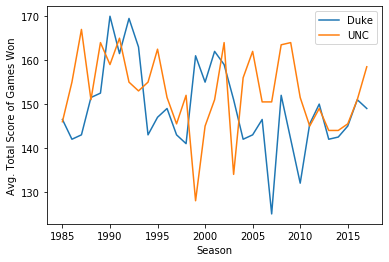

In [70]:
# If we want we can visualize these average scores as function of time 

plt.plot(table['Duke'],label='Duke')
plt.plot(table['North Carolina'],label='UNC')
plt.legend(loc='best')
plt.ylabel('Avg. Total Score of Games Won')
plt.xlabel('Season')

## Visualizing Data Relationships

So far we've seen a number of ways of manipulating our dataset.  However, it is interesting to then try to understand the relationships between the different variables in our set.  To do this there are a number of ways to visualize the data.

First lets upload some more detailed results for the regular season. 

In [71]:
df = pd.read_csv('data/RegularSeasonDetailedResults.csv')

This data has a lot more information, in fact its all the box scores available for all games played since 2003!

* Season - season
* DayNum - day in season (regular play < 132)
* WTeamId - winning team ID
* WScore - winning team score
* LScore - losing team score
* NumOT - number of over time periods
* WFGM - field goals made (by the winning team)
* WFGA - field goals attempted
* WFGM3 - three pointers made
* WFGA3 - three pointers attempted
* WFTM - free throws made
* WFTA - free throws attempted
* WOR - offensive rebounds
* WDR - defensive rebounds
* Wast - assists
* WTO turnovers
* WStl - steals
* WBlk - blocks
* WPF - personal fouls

This allows us to look for relationships, such as that between the number of field goals attempted, and the number of field goals made: 

Text(0, 0.5, 'field goals made')

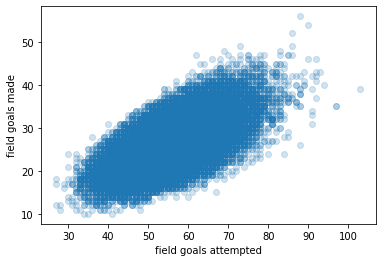

In [72]:
plt.scatter(df['WFGA'],df['WFGM'],alpha=0.2)
plt.xlabel('field goals attempted')
plt.ylabel('field goals made')

Unsurprisingly, there seems to be a correlation. Ideally, we would like to understand the correlation between all the variables in our dataset.  To do this we can use pandas **.corr**:

In [73]:
corr = df.corr()

In [74]:
# To plot the results, we can use a helpful set of plotting tools called seaborn 
import seaborn as sns

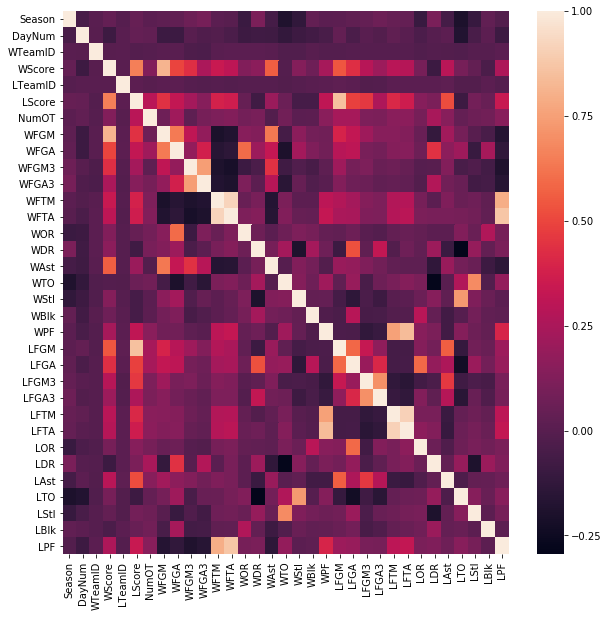

In [75]:
# plot the heatmap
plt.figure(figsize=(10,10)) 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

To visualize the relationships with a scatter plot as before we can use **pairplot**: 

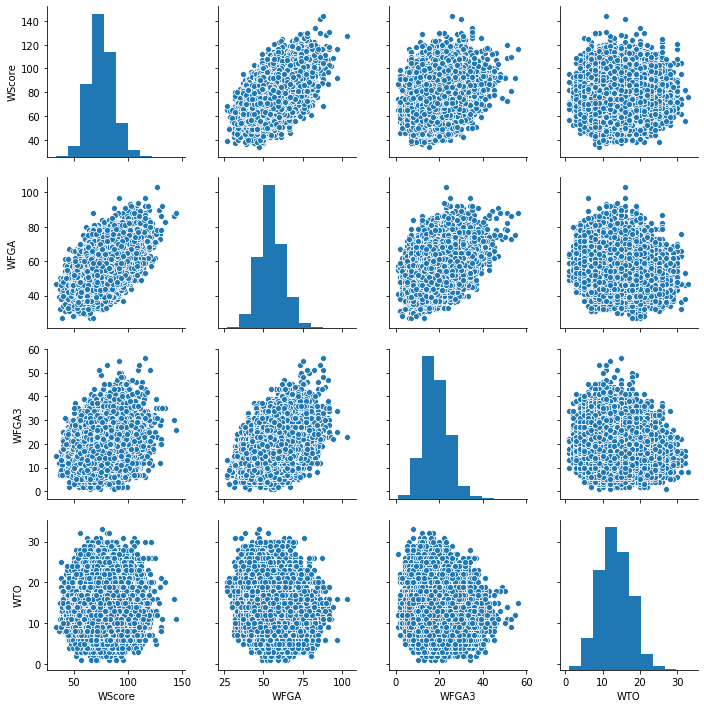

In [76]:
sns.pairplot(df[['WScore','WFGA','WFGA3','WTO']]) # Only plotting a few columns so we can read the labels

Seaborn is a helpful libary, there are a number of quick visualization tools, another is the regression plot: 

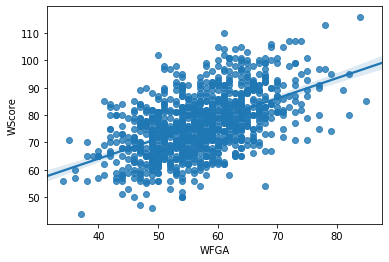

In [79]:
sns.regplot(df['WFGA'][0:1000],df['WScore'][0:1000]) # Plot the regression line fit to our variables

If we would like to use the seaborn style of plots rather than the matplotlib default, we can do: 

In [80]:
sns.set()

Text(0, 0.5, 'WSCore')

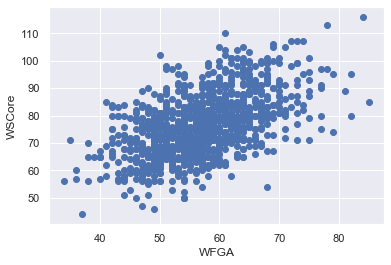

In [82]:
plt.scatter(df['WFGA'][0:1000],df['WScore'][0:1000])
plt.xlabel('WFGA')
plt.ylabel('WSCore')

This concludes our pandas tutorial!

**Bonus** Often times, pandas dataframes represent input data to a machine learning algorihthm, if would like to save the our input data in a readable format for Scikit-Learn we can do: 

In [86]:
df.values.shape

(76636, 34)

In [ ]:
np.save('bb_input_matrix')